In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

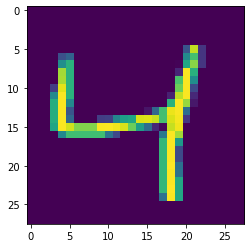

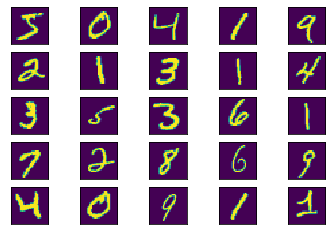

In [2]:
mnist_data = tf.keras.datasets.mnist
(x_train,y_train) , (x_test,y_test)= mnist_data.load_data()
class_names = ['0','1','2','3','4','5','6','7','8','9']
x_test.shape
plt.imshow(x_train[2])
plt.show()
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i])
    #plt.xlablel(class_names(y_train[i]))
plt.show()

In [7]:
model = tf.keras.Sequential([tf.keras.layers.Flatten(input_shape=(28,28)),
                         tf.keras.layers.Dense(128, activation = 'relu'),
                         tf.keras.layers.Dense(128, activation = 'relu'),
                         tf.keras.layers.Dense(10, activation = 'softmax')
                         ])

In [8]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [9]:
model.fit(x_train, y_train, epochs=10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 6s 95us/sample - loss: 1.7287 - accuracy: 0.8755
Epoch 2/10
60000/60000 [==============================] - 5s 91us/sample - loss: 0.3951 - accuracy: 0.9264
Epoch 3/10
60000/60000 [==============================] - 5s 91us/sample - loss: 0.2476 - accuracy: 0.9406
Epoch 4/10
60000/60000 [==============================] - 5s 91us/sample - loss: 0.1941 - accuracy: 0.9503
Epoch 5/10
60000/60000 [==============================] - 5s 90us/sample - loss: 0.1589 - accuracy: 0.9571
Epoch 6/10
60000/60000 [==============================] - 5s 91us/sample - loss: 0.1350 - accuracy: 0.9631
Epoch 7/10
60000/60000 [==============================] - 5s 91us/sample - loss: 0.1270 - accuracy: 0.9652
Epoch 8/10
60000/60000 [==============================] - 5s 90us/sample - loss: 0.1128 - accuracy: 0.9699
Epoch 9/10
60000/60000 [==============================] - 5s 91us/sample - loss: 0.1080 - accuracy: 0.9700
Epoch 10/10
60

In [10]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print("/n test loss", test_loss)
print("/n test accuracy", test_acc)

10000/10000 [==============================] - 1s 56us/sample - loss: 0.1704 - accuracy: 0.9608
/n test loss 0.1704413125446881
/n test accuracy 0.9608


In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_olivetti_faces
from sklearn.utils.validation import check_random_state

from sklearn.ensemble import ExtraTreesRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV

# Load the faces datasets
data, targets = fetch_olivetti_faces #(return_x_y=True)

train = data[targets < 30]
test = data[targets >= 30]  # Test on independent people

# Test on a subset of people
n_faces = 5
rng = check_random_state(4)
face_ids = rng.randint(test.shape[0], size=(n_faces, ))
test = test[face_ids, :]

n_pixels = data.shape[1]
# Upper half of the faces
X_train = train[:, :(n_pixels + 1) // 2]
# Lower half of the faces
y_train = train[:, n_pixels // 2:]
X_test = test[:, :(n_pixels + 1) // 2]
y_test = test[:, n_pixels // 2:]

# Fit estimators
ESTIMATORS = {
    "Extra trees": ExtraTreesRegressor(n_estimators=10, max_features=32,
                                       random_state=0),
    "K-nn": KNeighborsRegressor(),
    "Linear regression": LinearRegression(),
    "Ridge": RidgeCV(),
}

y_test_predict = dict()
for name, estimator in ESTIMATORS.items():
    estimator.fit(X_train, y_train)
    y_test_predict[name] = estimator.predict(X_test)

# Plot the completed faces
image_shape = (64, 64)

n_cols = 1 + len(ESTIMATORS)
plt.figure(figsize=(2. * n_cols, 2.26 * n_faces))
plt.suptitle("Face completion with multi-output estimators", size=16)

for i in range(n_faces):
    true_face = np.hstack((X_test[i], y_test[i]))

    if i:
        sub = plt.subplot(n_faces, n_cols, i * n_cols + 1)
    else:
        sub = plt.subplot(n_faces, n_cols, i * n_cols + 1,
                          title="true faces")

    sub.axis("off")
    sub.imshow(true_face.reshape(image_shape),
               cmap=plt.cm.gray,
               interpolation="nearest")

    for j, est in enumerate(sorted(ESTIMATORS)):
        completed_face = np.hstack((X_test[i], y_test_predict[est][i]))

        if i:
            sub = plt.subplot(n_faces, n_cols, i * n_cols + 2 + j)

        else:
            sub = plt.subplot(n_faces, n_cols, i * n_cols + 2 + j,
                              title=est)

        sub.axis("off")
        sub.imshow(completed_face.reshape(image_shape),
                   cmap=plt.cm.gray,
                   interpolation="nearest")

plt.show()

TypeError: cannot unpack non-iterable function object

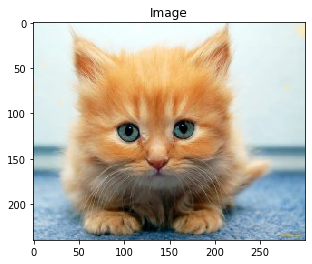

In [1]:
import numpy as np
import cv2
%matplotlib inline
#Comment: The purpose of the above line is to display matplotlib plots inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img_water = mpimg.imread('cat.jpg')
#resized = cv2.resize(img_water, (300, 300))
plt.imshow(img_water)
plt.title('Image')
plt.show()

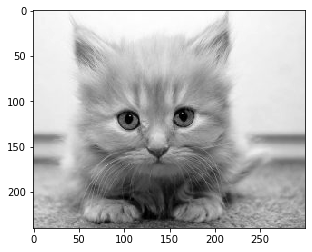

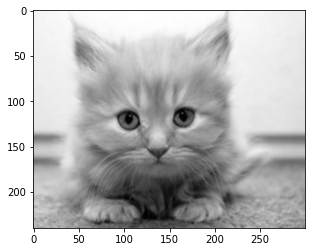

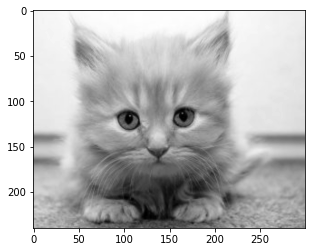

In [6]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

img = cv2.imread('cat.jpg',0)
plt.imshow(img, cmap = 'gray')
plt.show()
plt.imshow(img, cmap = 'gray', interpolation='bicubic')
#plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()
plt.imshow(img, cmap = 'gray', interpolation='gaussian')
plt.show()